We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [32]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [33]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [34]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [35]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [36]:
#now call evalf (x) with my_x as argument and check if it works
print(evalf(my_x))

10730


In [37]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [38]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [39]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

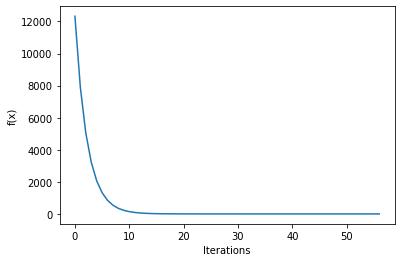

In [40]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

Que-2:

In [41]:
print('The minimizer is ',opt_x)
print('Minimum function value ',evalf(opt_x))

The minimizer is  [-99.99958844  24.99994388]
Minimum function value  1.7253033717248775e-07


Que-3

In [42]:
start_point=np.array([10,10])
step_length = 0.1
Tolerance = [10**(-p) for p in range(1,11)]

In [43]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
  return k, x, fvals 


In [44]:
Num_of_iterations=[]
Min_function_value=[]
minimizers_list =[]
for tolerance in Tolerance:
  iterations,minimizer,function_values=find_minimizer(start_point, tolerance, step_length)
  Num_of_iterations.append(iterations)
  Min_function_value.append(evalf(minimizer))
  minimizers_list.append(opt_x)

In [45]:
print('Number of iterations :',Num_of_iterations)

Number of iterations : [35, 45, 56, 66, 76, 87, 97, 107, 118, 128]


In [46]:
print('Minimun function values',Min_function_value)

Minimun function values [0.0020280843668995063, 2.3382220797474075e-05, 1.7253033717248775e-07, 1.989139359193299e-09, 2.293321544605827e-11, 1.6921726745458407e-13, 1.950942200128245e-15, 2.249273021138356e-17, 1.6597088735501767e-19, 1.9135732950098918e-21]


In [47]:
print('Minimizers of the function',minimizers_list)

Minimizers of the function [array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388]), array([-99.99958844,  24.99994388])]


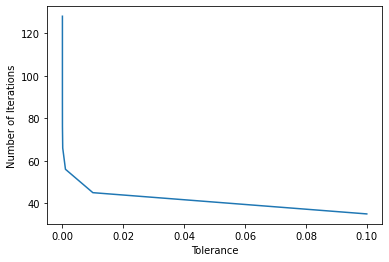

In [48]:
#we will plot the function values and check the behavior
plt.plot(Tolerance,Num_of_iterations)
plt.ylabel('Number of Iterations')
plt.xlabel('Tolerance')
plt.show()

Observation :
Number of iterations decreases with increase in tolerance values .Minimizers point is tending towards [-100,25]

Ques 4

In [49]:
start_point=np.array([10,10])
Tolerance = 0.00001
step_length = [0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]

In [50]:
Num_of_iterations=[]
Min_function_value=[]
for step_len in step_length:
  iterations,minimizer,function_values=find_minimizer(start_point, tolerance, step_len)
  Num_of_iterations.append(iterations)
  Min_function_value.append(evalf(minimizer))

In [51]:
print('Number of iterations :',Num_of_iterations)
print('Minimun function values',Min_function_value)

Number of iterations : [142249, 14201, 1408, 128, 56, 18, 1, 18, 32, 56, 128]
Minimun function values [2.4993272305709318e-21, 2.4971541144145524e-21, 2.412929316208503e-21, 1.9135732950098918e-21, 1.7527030236880586e-21, 8.468567599042847e-22, 0.0, 8.468567599042847e-22, 4.1946933950432774e-22, 1.7527030236880586e-21, 1.9135732950098918e-21]


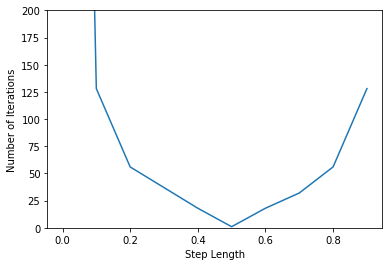

In [52]:
#we will plot the function values and check the behavior
plt.plot(step_length,Num_of_iterations)
plt.ylabel('Number of Iterations')
plt.xlabel('Step Length')
plt.ylim([0,200])
plt.show()


Observation: \\
Number of iterations decreases with increase in step length to a certain point (say for 0.5 we can see from the graph )and after that point with increase in step length number of iterations also increases.Minimizer points and minimum value of function behaves same.

Ques 5

In [53]:
tolerance=0.00001
step_length=0.1
start_p=[np.array([10000,10000]),np.array([500,0]),np.array([0,1000]),np.array([1,1]),np.array([-500,-2])]


In [54]:
Num_of_iterations=[]
final_minimizer = []
Min_function_value=[]

for start_point in start_p:
  iterations,minimizer,function_values=find_minimizer(start_point, tolerance, step_length)
  Num_of_iterations.append(iterations)
  Min_function_value.append(evalf(minimizer))
  final_minimizer.append(minimizer)

In [55]:
print('Number of iterations',Num_of_iterations)
print('Final minimizer',final_minimizer)
print('Minimum function value',Min_function_value)

Number of iterations [98, 84, 86, 76, 82]
Final minimizer [array([-99.99999679,  25.00000317]), array([-99.99999566,  24.99999982]), array([-99.99999954,  25.00000452]), array([-99.99999564,  24.99999896]), array([-100.00000452,   24.99999969])]
Minimum function value [2.0414342669998657e-11, 1.888746375147865e-11, 2.060780080476227e-11, 2.0052840841640608e-11, 2.055190630073527e-11]


In [56]:
start_points = [start_p[i].tolist() for i in range(5)]
minimizer_list = [final_minimizer[i].tolist() for i in range(5)]
print(start_points)
minimizer_list

[[10000, 10000], [500, 0], [0, 1000], [1, 1], [-500, -2]]


[[-99.9999967853026, 25.00000317491154],
 [-99.99999565779666, 24.999999819074862],
 [-99.99999953683165, 25.000004515891483],
 [-99.99999564327261, 24.999998964738047],
 [-100.0000045231285, 24.999999694688828]]

In [57]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [[(start_points[i]), 
          (minimizer_list[i]), 
          (Num_of_iterations[i]), 
          (Min_function_value[i])] for i in range(5)]
  
# create header
head = ["Start Point", "Final Minimizer","Number of iterations","Minimum Value of Function"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------+------------------------------------------+------------------------+-----------------------------+
| Start Point    | Final Minimizer                          |   Number of iterations |   Minimum Value of Function |
+================+==========================================+========================+=============================+
| [10000, 10000] | [-99.9999967853026, 25.00000317491154]   |                     98 |                 2.04143e-11 |
+----------------+------------------------------------------+------------------------+-----------------------------+
| [500, 0]       | [-99.99999565779666, 24.999999819074862] |                     84 |                 1.88875e-11 |
+----------------+------------------------------------------+------------------------+-----------------------------+
| [0, 1000]      | [-99.99999953683165, 25.000004515891483] |                     86 |                 2.06078e-11 |
+----------------+------------------------------------------+---

Observation : \\
We can clearly observe that there is no major change in final minimers and in number of iterations but we can see that the minimum value of function is at start point [500,0]